In [21]:
%matplotlib inline
from casadi import *
import numpy
from pylab import *

In [2]:
u = SX.sym('u')

In [3]:
x = SX.sym('x')

In [4]:
y = SX.sym('y')

In [5]:
ode = vertcat((1-y*y)*x - y + u,x)

In [6]:
dae = {'x':vertcat(x,y),'p' :u,'ode':ode}

In [7]:
opts = {}
opts["fsens_err_con"] = True
opts["quad_err_con"] = True
opts["abstol"] = 1e-6
opts["reltol"] = 1e-6
tend = 10
opts["t0"] = 0
opts["tf"] = tend

In [14]:
ts = numpy.linspace(0,tend,100)

In [29]:
opts["grid"] = ts
opts["output_t0"] = True

In [30]:
F = integrator("F","cvodes",dae,opts)

In [31]:
print "%d %d" %(F.n_in(),F.n_out())

6 6


In [32]:
x0 = 0; y0 =1 

In [33]:
sol = F(x0 = [x0,y0],p=0)

In [34]:
sol = sol['xf'].full().T

In [22]:
figure()

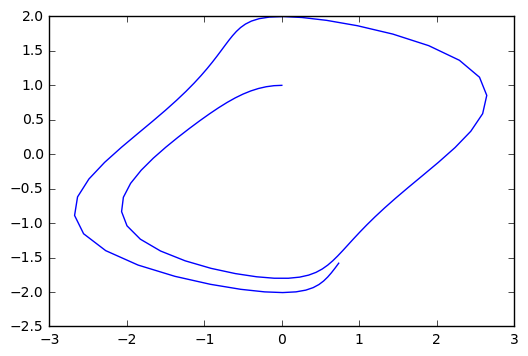

In [35]:
plot(sol[:,0],sol[:,1])

In [36]:
print sol

[[ 0.          1.        ]
 [-0.10086335  0.99490208]
 [-0.20106346  0.97964651]
 [-0.30046733  0.95431079]
 [-0.39949528  0.91895889]
 [-0.49902794  0.87358735]
 [-0.60032993  0.81808456]
 [-0.70497271  0.75219512]
 [-0.81474893  0.67549238]
 [-0.93156143  0.58736207]
 [-1.05724107  0.48699955]
 [-1.19323047  0.37343154]
 [-1.34004707  0.24557816]
 [-1.49635566  0.10239358]
 [-1.65764687 -0.05688644]
 [-1.81450254 -0.23233862]
 [-1.9509591  -0.42276897]
 [-2.04418503 -0.62501702]
 [-2.06737109 -0.83337222]
 [-1.9973718  -1.03951547]
 [-1.82529146 -1.23342174]
 [-1.56411809 -1.40524127]
 [-1.24664237 -1.54750257]
 [-0.91356049 -1.65657045]
 [-0.59954357 -1.73271696]
 [-0.32542916 -1.7790476 ]
 [-0.09822269 -1.80004833]
 [ 0.08453998 -1.80039112]
 [ 0.22994745 -1.78422853]
 [ 0.34630979 -1.75491446]
 [ 0.44136849 -1.71498289]
 [ 0.52163544 -1.66624655]
 [ 0.59233842 -1.60992573]
 [ 0.65762374 -1.54676743]
 [ 0.72083836 -1.47714417]
 [ 0.78479562 -1.40111984]
 [ 0.85200419 -1.31849099]
 